<a href="https://colab.research.google.com/github/0Pedrh0/Automatic_Speech_Processing/blob/main/TP2_3EA_2024_Hani_Benarib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 Traitement Autonmatique de la Parole

**NOM1** : HANI

**Prénom1** : Badreddine

**Email1** : badrhanib@gmail.com

**NOM2** : BENARIB

**Prénom2** : Ilyes

**Email2** : benarib.ilyes@gmail.com

Initialisation de l'environnement de TP

In [1]:
# OS setup
#!cat /etc/os-release
!apt-get install -qq bc tree sox

# Liaison avec les données
!git clone https://github.com/0Pedrh0/Automatic_Speech_Processing.git

# Spectrum
!pip install spectrum

Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 126666 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.5-1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.5-1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../1-libopencore-amrwb0_0.1.5-1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.5-1) ...
Selecting previously unselected package libsox3:amd64.
Preparing to unpack .../2-libsox3_14.4.2+git20190427-2+deb11u2ubuntu0.22.04.1_amd64.deb ...
Unpacking libsox3:amd64 (14.4.2+git20190427-2+deb11u2ubuntu0.22.04.1) ...
Selecting previously unselected package libsox-fmt-alsa:amd64.
Preparing to unpack .../3-libsox-fmt-alsa_14.4.2+git20190427-2+deb11u2ubuntu0.22.04.1_amd64.deb ...
Unpacking libsox-fmt-alsa:amd64 (14.4.2+git20190427-2+deb11u2ubuntu0.22.04.1) ...
Selecting previously unselected package libwavpack1:amd64.
Preparing to unpack .../4-libwavpack1_

In [123]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import scipy.signal
import numpy as np
import librosa as l
from IPython.display import Audio

In [6]:
!tree Automatic_Speech_Processing/tp-3en-n7/signaux/alpha/

Automatic_Speech_Processing/tp-3en-n7/signaux/alpha/
├── mots_inconnus
│   ├── alpha.wav
│   ├── bravo.wav
│   ├── charlie.wav
│   ├── delta.wav
│   ├── echo.wav
│   ├── foxtrott.wav
│   ├── golf.wav
│   ├── hotel.wav
│   ├── india.wav
│   ├── juliett.wav
│   ├── kilo.wav
│   ├── lima.wav
│   └── mike.wav
└── references
    ├── alpha.wav
    ├── bravo.wav
    ├── charlie.wav
    ├── delta.wav
    ├── echo.wav
    ├── foxtrott.wav
    ├── golf.wav
    ├── hotel.wav
    ├── india.wav
    ├── juliett.wav
    ├── kilo.wav
    ├── lima.wav
    └── mike.wav

2 directories, 26 files


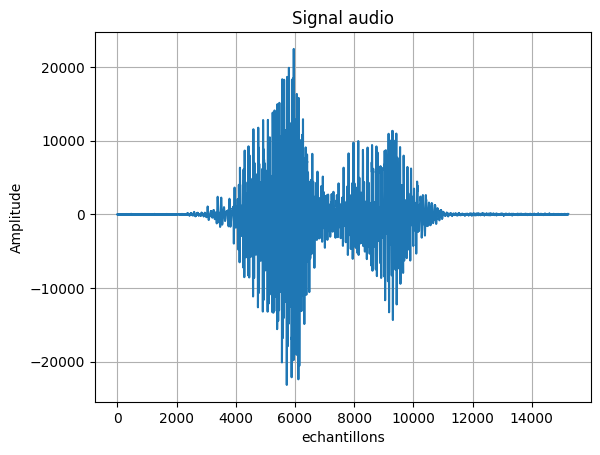

In [7]:
(fe,signal) =  scipy.io.wavfile.read("Automatic_Speech_Processing/tp-3en-n7/signaux/alpha/references/bravo.wav")
# Affichage du signal
plt.figure(1)
plt.plot(np.arange(len(signal)),signal)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()
# lecture du fichier
Audio(data=signal, rate=fe)

Nous allons commencer par travailler sur un extrait voisé du signal :

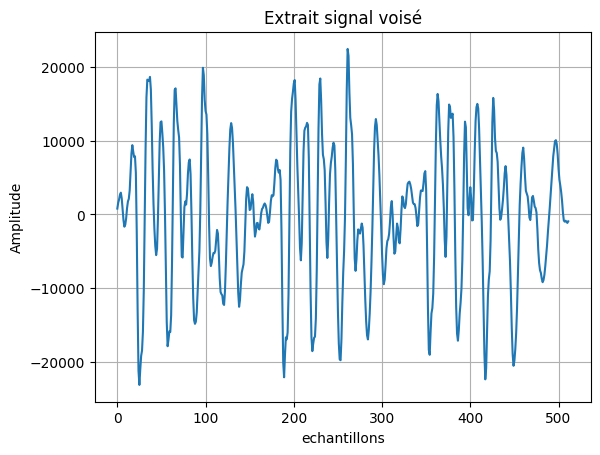

In [8]:
extrait = signal[5700:6212]
# Affichage du signal
plt.figure(1)
plt.plot(np.arange(len(extrait)),extrait)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Extrait signal voisé')
plt.grid(True)
plt.show()

***Affichez une fenetre hamming de 512 points. Puis créez la variable extrait_fenetre qui resulte de la multiplication point par point de la fenetre de hamming et de l'extrait de signal. Affichez le signal résultant.***

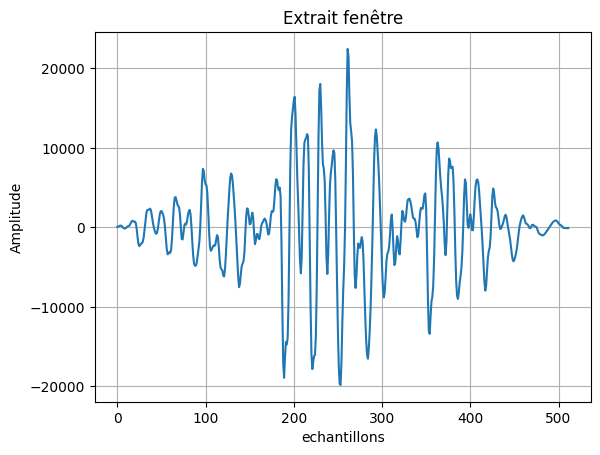

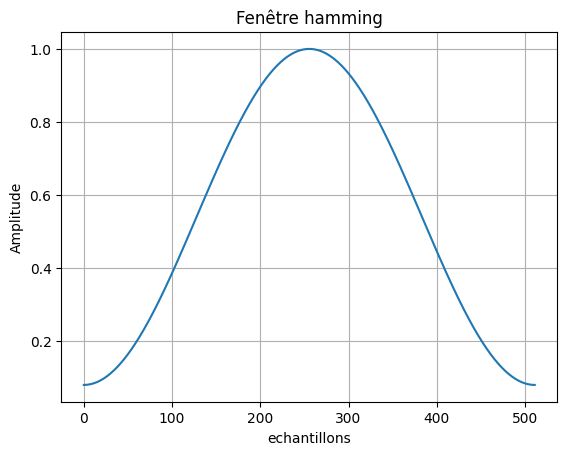

In [10]:
# a vous
fenetre_hamming = scipy.signal.windows.hamming(512)
extrait_fenetre = extrait*fenetre_hamming
plt.figure(1)
plt.plot(np.arange(len(extrait_fenetre)),extrait_fenetre)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Extrait fenêtre')
plt.grid(True)

plt.figure(2)
plt.plot(np.arange(len(fenetre_hamming)),fenetre_hamming)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Fenêtre hamming')
plt.grid(True)

plt.show()



***Affichez le spectre de puissance de la transformée de Fourier de l'extrait fenetré. Représentez les fréquences en abscisse. Vous pouvez utiliser la fonction np.fft.fft pour calculer la transformée de Fourier ou bien utiliser son équivalent sur librosa.***

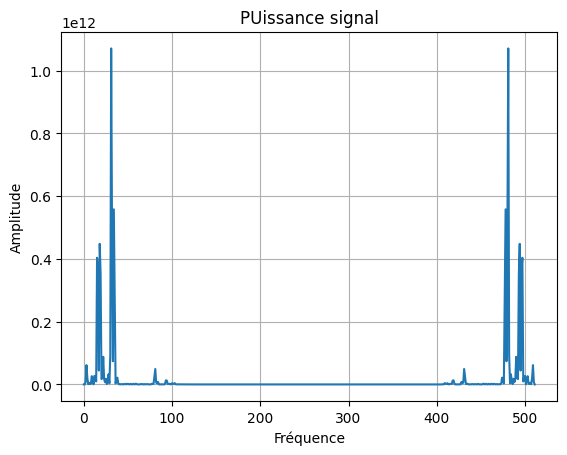

In [12]:
# A vous...
extrait_fft = np.fft.fft(extrait_fenetre)
puissance_extrait = abs(extrait_fft)**2
plt.figure(1)
plt.plot(np.arange(len(puissance_extrait)),puissance_extrait)
plt.xlabel('Fréquence')
plt.ylabel('Amplitude')
plt.title('PUissance signal')
plt.grid(True)


***Affichez un spectrogramme du signal de départ.***

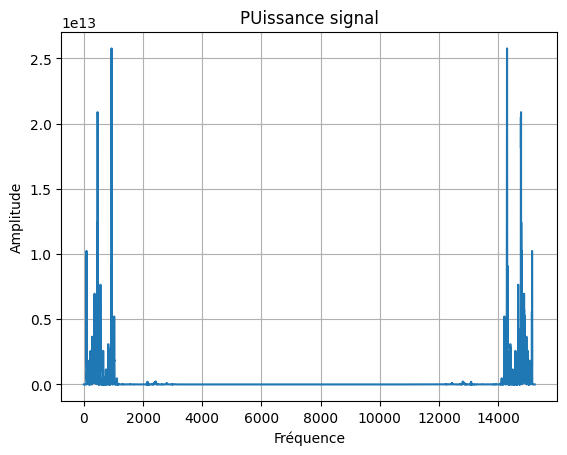

In [18]:
# A vous...
signal_fft = np.fft.fft(signal)
puissance_signal = abs(signal_fft)**2
plt.figure(1)
plt.plot(np.arange(len(puissance_signal)),puissance_signal)
plt.xlabel('Fréquence')
plt.ylabel('Amplitude')
plt.title('PUissance signal')
plt.grid(True)


***Calculez le log énergie du signal sur des fenêtres de 512 points avec recouvrement sur la moitié. Affichez les valeurs ainsi calculées aligné avec le signal.***

$E=\log\left(\sum_{i=1}^{n}x_{i}^{2}\right)$

In [99]:
# A vous
signal_normalise = signal/max(signal)
log_histogram = []
log = []
for k in range (np.floor(signal_normalise.shape[0]/512).astype(int)):
  extrait =signal_normalise[k*512:(k+1)*512+1]
  log_energie = np.log(np.sum((extrait**2)))
  log.append(log_energie)
  for j in range(512):
    log_histogram.append(log_energie)

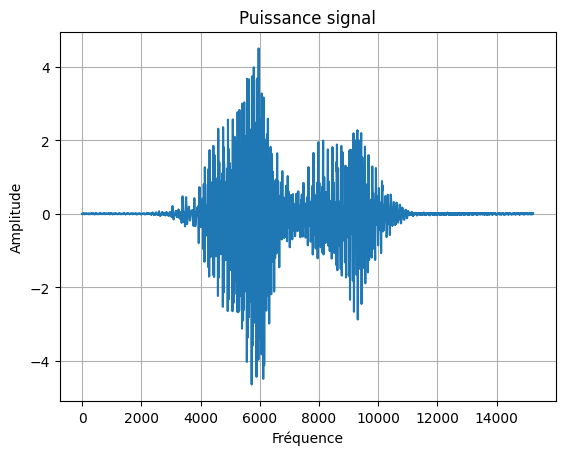

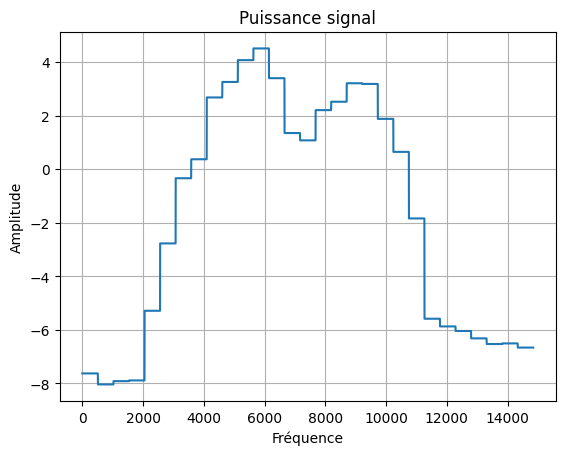

In [82]:
plt.figure(1)
plt.plot(np.arange(len(signal_normalise)),signal_normalise*max(log))
plt.xlabel('Fréquence')
plt.ylabel('Amplitude')
plt.title('Puissance signal')
plt.grid(True)


plt.figure(2)
plt.plot(np.arange(len(log)),log)
plt.xlabel('Fréquence')
plt.ylabel('Amplitude')
plt.title('Puissance signal')
plt.grid(True)
plt.show()

***Peut-on repérer les voyelles facilement avec cette représentation ?***



```
# Ce texte est au format code
```
Non parceque c'est pas facile ;)


***Calculez le cepstre de l'extrait de signal. Affichez le. Où se trouve l'excitation liée à la vibration des cordes vocales ?***

512


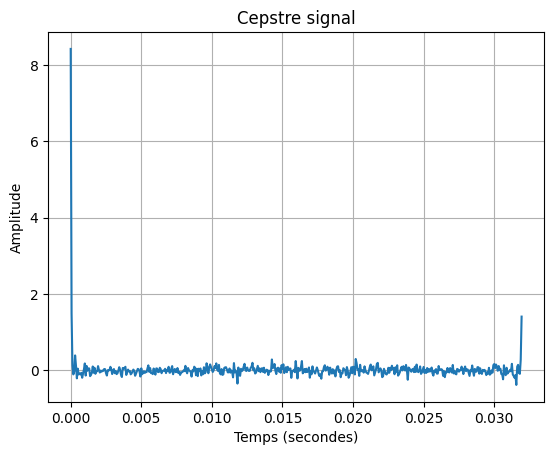

In [110]:
# A vous...

cepstre = np.fft.ifft(np.log(extrait_fft))
N = np.floor(len(cepstre)).astype(int)
print(N)
plt.figure(1)
plt.plot(np.arange(N)/fe,np.real(cepstre))
plt.xlabel('Temps (secondes)')
plt.ylabel('Amplitude')
plt.title('Cepstre signal')
plt.grid(True)
plt.show()

***Calculez et affichez le spectre lissé de cet extrait.***

On retire la fréquence fondamentale pour lissé le signal

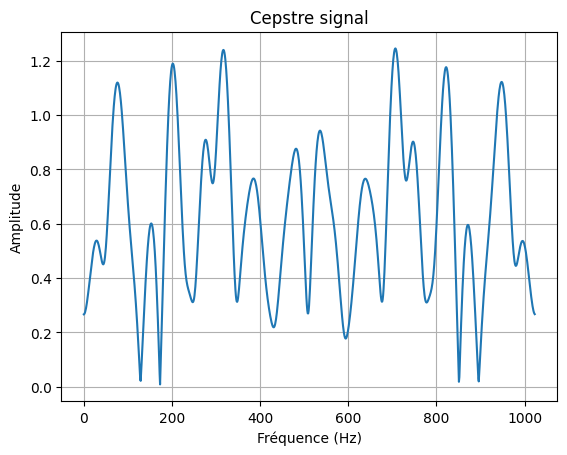

In [121]:
# A vous...
cepstre_partie = cepstre[2:33]
plt.figure(1)
plt.plot(np.abs(np.fft.fft(cepstre_partie,1024)))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Cepstre signal')
plt.grid(True)
plt.show()

***En utilisant librosa, affichez une matrice des 12 premiers coefficients MFCC
du signal de départ.***

[Text(0.5, 1.0, 'MFCC')]

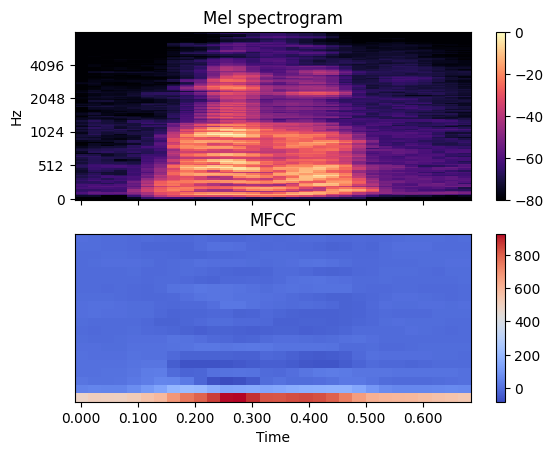

In [150]:
# A vous...
y, sr = signal.astype(float),fe
mfccs = l.feature.mfcc(y=y, sr=sr)
S = l.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)


fig, ax = plt.subplots(nrows=2, sharex=True)

img = l.display.specshow(l.power_to_db(S, ref=np.max),x_axis='time', y_axis='mel', fmax=8000, ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = l.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

***Comparez la premier coefficient de cette matrice avec votre propre calcul de l'énergie normalisé. Y a-t-il une corrélation ? (vérification visuelle, en affichant les deux courbes)***

In [ ]:
# A vous...

Réponse...

In [ ]:
# A vous...

***En utilisant les MFCC, mettez en place un détecteur d'activité vocale afin de filtrer les fichiers que vous avez à traiter : visualisez le résultats sur les signaux "references" (affichage du signal et matérialisation des zones de silence). Vous ne devez pas altérer les zones de silences de moins de 300 ms comprises dans les zones de parole.***

In [ ]:
# A vous...